# Inverse Translatation of a Stochastic Process
Author: Lohit Vandanapu
Date: May 14, 2019

In this example, a Gaussian stochastic processes is first translated into a stocahstic processes of a different distribution and subsequently, these translated samples are translated back to Gaussian samples with InverseTranslate class.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the InverseTranslation class along with the Translation class from the StochasticProcesses module of UQpy.

In [1]:
from UQpy.StochasticProcess import Translation, InverseTranslation
from UQpy.StochasticProcess import SRM
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Firstly we generate Gaussian Stochastic Processes using the Spectral Representation Method.

In [2]:
n_sim = 10000  # Num of samples
T = 100  # Time(1 / T = dw)
nt = 256  # Num.of Discretized Time
F = 1 / T * nt / 2  # Frequency.(Hz)
nw = 128  # Num of Discretized Freq.
dt = T / nt
t = np.linspace(0, T - dt, nt)
dw = F / nw
w = np.linspace(0, F - dw, nw)
S = 125 / 4 * w ** 2 * np.exp(-5 * w)
SRM_object = SRM(n_sim, S, dw, nt, nw, case='uni')
samples = SRM_object.samples

In [3]:
def S_to_R(S, w, t):
    dw = w[1] - w[0]
    fac = np.ones(len(w))
    fac[1: len(w) - 1: 2] = 4
    fac[2: len(w) - 2: 2] = 2
    fac = fac * dw / 3
    R = np.zeros(len(t))
    for i in range(len(t)):
        R[i] = 2 * np.dot(fac, S * np.cos(w * t[i]))
    return R

In [4]:
R = S_to_R(S, w, t)

We translate the samples to be Uniform samples from 1 to 2

In [5]:
from UQpy.Distributions import Uniform

distribution = Uniform(0, 1)
samples = samples.flatten()[:, np.newaxis]
print(samples.shape)

Translate_object = Translation(distribution=distribution, time_duration=dt, frequency_interval=dw, number_time_intervals=nt, number_frequency_intervals=nw, auto_correlation_function_gaussian=R, samples_gaussian=samples)
samples_ng = Translate_object.samples_non_gaussian
R_ng = Translate_object.auto_correlation_function_non_gaussian
r_ng = Translate_object.correlation_function_non_gaussian

(2560000, 1)
(2560000, 1)


Plotting the actual and translated autocorrelation functions

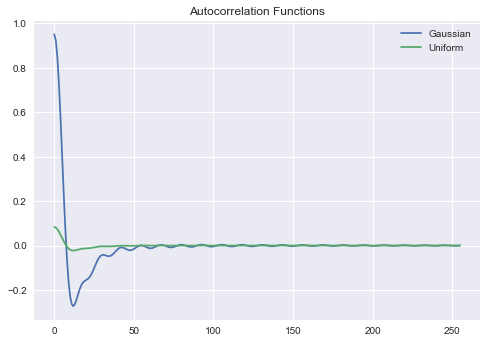

In [6]:
fig1 = plt.figure()
plt.plot(R, label='Gaussian')
plt.plot(R_ng, label='Uniform')
plt.title('Autocorrelation Functions')
plt.legend()
plt.show()

In [7]:
InverseTranslate_object = InverseTranslation(distribution=distribution, time_duration=dt, frequency_interval=dw, number_time_intervals=nt, number_frequency_intervals=nw, auto_correlation_function_non_gaussian=R_ng, samples_non_gaussian=samples_ng)
samples_g = InverseTranslate_object.samples_gaussian
S_g = InverseTranslate_object.power_spectrum_gaussian
R_g = InverseTranslate_object.auto_correlation_function_gaussian
r_g = InverseTranslate_object.correlation_function_gaussian

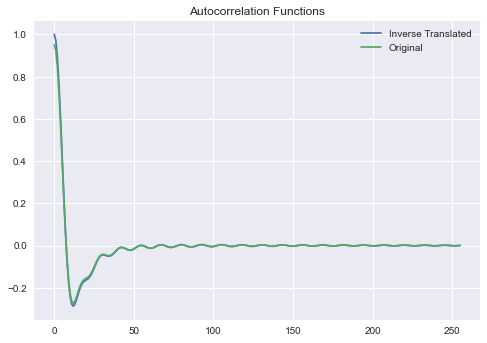

[ 1.00000000e+00  9.71178192e-01  8.87772359e-01  7.58528808e-01
  5.96654281e-01  4.17996481e-01  2.38925561e-01  7.42520034e-02
 -6.45011071e-02 -1.70225111e-01 -2.40617216e-01 -2.77831344e-01
 -2.87507447e-01 -2.77394463e-01 -2.55834138e-01 -2.30373783e-01
 -2.06728570e-01 -1.88230061e-01 -1.75795490e-01 -1.68352538e-01
 -1.63575813e-01 -1.58747606e-01 -1.51552464e-01 -1.40650120e-01
 -1.25934238e-01 -1.08460220e-01 -9.00974817e-02 -7.30153643e-02
 -5.91375770e-02 -4.96944168e-02 -4.49687288e-02 -4.42799065e-02
 -4.61927774e-02 -4.88879980e-02 -5.05981384e-02 -5.00049822e-02
 -4.65090745e-02 -4.03172252e-02 -3.23385735e-02 -2.39242086e-02
 -1.65192439e-02 -1.13125363e-02 -8.96520468e-03 -9.47670177e-03
 -1.22124776e-02 -1.60787813e-02 -1.97968560e-02 -2.22080654e-02
 -2.25375102e-02 -2.05566013e-02 -1.66111305e-02 -1.15140498e-02
 -6.33362301e-03 -2.13065466e-03  2.91849963e-04  5.68663598e-04
 -1.15732065e-03 -4.28661059e-03 -7.91986586e-03 -1.10793293e-02
 -1.29407850e-02 -1.30213

In [12]:
fig2 = plt.figure()
plt.plot(r_g, label='Inverse Translated')
plt.plot(R, label='Original')
plt.title('Autocorrelation Functions')
plt.legend()
plt.show()